In [1]:
import os
import warnings
import pandas as pd
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글, 마이너스 깨짐 방지
from matplotlib import rc, font_manager, rcParams
font=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font)
rcParams['axes.unicode_minus'] = False

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
import lightgbm as lgb

In [6]:
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
pd.set_option('display.width',600)
pd.set_option('precision', 10)

In [53]:
plt.style.use("ggplot")

In [8]:
os.listdir('data')

['bus_bts.csv',
 'submission_sample.csv',
 'test.csv',
 'train.csv',
 '행정_법정동 중심좌표.xlsx']

In [9]:
train_path = os.path.join("data", "train.csv")
test_path = os.path.join("data", "test.csv")

In [10]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [11]:
train2 = train.copy()
test2 = test.copy()

In [54]:
# from IPython import display

In [12]:
# data 살펴보기
def data_look(df):
    display(df.info())
    print()
    display(df.isna().sum())
    print()
    display(df.describe())
    print()
    display(df.head())

In [13]:
data_look(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
id               415423 non-null int64
date             415423 non-null object
bus_route_id     415423 non-null int64
in_out           415423 non-null object
station_code     415423 non-null int64
station_name     415423 non-null object
latitude         415423 non-null float64
longitude        415423 non-null float64
6~7_ride         415423 non-null float64
7~8_ride         415423 non-null float64
8~9_ride         415423 non-null float64
9~10_ride        415423 non-null float64
10~11_ride       415423 non-null float64
11~12_ride       415423 non-null float64
6~7_takeoff      415423 non-null float64
7~8_takeoff      415423 non-null float64
8~9_takeoff      415423 non-null float64
9~10_takeoff     415423 non-null float64
10~11_takeoff    415423 non-null float64
11~12_takeoff    415423 non-null float64
18~20_ride       415423 non-null float64
dtypes: float64(15), int64(3), object

None

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
dtype: int64

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.0000000000,4.1542300000e+05,4.1542300000e+05,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000,415423.0000000000
mean,207711.0000000000,2.6919350951e+07,4.2093112160e+04,33.4203745817,126.5335740682,0.3058930295,0.8296988852,0.8153496557,0.6424752602,0.5996177390,0.5793925709,0.1128704959,0.3448701685,0.5164807919,0.4309222166,0.4080010014,0.4028736974,1.2420954064
std,119922.4347762614,3.9246519870e+06,4.9715040422e+05,0.1079956958,0.1409864972,1.1097659759,2.2551160607,2.3175606424,1.9598439196,1.8859405385,1.9421373911,0.5977142216,1.2791789229,1.6588496973,1.4851235797,1.4128389996,1.4460801899,4.7222869137
min,0.0000000000,4.2700000000e+06,1.0000000000e+00,33.2083500000,126.1650400000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,103855.5000000000,2.3460000000e+07,3.2000000000e+02,33.2910800000,126.4757800000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,207711.0000000000,2.8030000000e+07,1.1300000000e+03,33.4788500000,126.5297700000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,311566.5000000000,3.0030000000e+07,2.2260000000e+03,33.5000200000,126.5758900000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
max,415422.0000000000,3.2820000000e+07,6.1151010000e+06,33.9636400000,126.9656700000,85.0000000000,94.0000000000,136.0000000000,78.0000000000,124.0000000000,99.0000000000,45.0000000000,66.0000000000,59.0000000000,65.0000000000,52.0000000000,81.0000000000,272.0000000000


,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
# y
set(train.columns) - set(test.columns)

{'18~20_ride'}

In [15]:
# column unique
for col in train.columns:
    print(f"col : {col}")
    print(f"unique 수 : {train[col].nunique()}")
    print()

col : id
unique 수 : 415423

col : date
unique 수 : 30

col : bus_route_id
unique 수 : 613

col : in_out
unique 수 : 2

col : station_code
unique 수 : 3563

col : station_name
unique 수 : 1961

col : latitude
unique 수 : 3278

col : longitude
unique 수 : 3446

col : 6~7_ride
unique 수 : 47

col : 7~8_ride
unique 수 : 80

col : 8~9_ride
unique 수 : 78

col : 9~10_ride
unique 수 : 66

col : 10~11_ride
unique 수 : 66

col : 11~12_ride
unique 수 : 69

col : 6~7_takeoff
unique 수 : 35

col : 7~8_takeoff
unique 수 : 51

col : 8~9_takeoff
unique 수 : 53

col : 9~10_takeoff
unique 수 : 46

col : 10~11_takeoff
unique 수 : 47

col : 11~12_takeoff
unique 수 : 55

col : 18~20_ride
unique 수 : 170



In [16]:
# column unique
for col in test.columns:
    print(f"col : {col}")
    print(f"unique 수 : {test[col].nunique()}")
    print()

col : id
unique 수 : 228170

col : date
unique 수 : 16

col : bus_route_id
unique 수 : 601

col : in_out
unique 수 : 2

col : station_code
unique 수 : 3505

col : station_name
unique 수 : 1954

col : latitude
unique 수 : 3230

col : longitude
unique 수 : 3386

col : 6~7_ride
unique 수 : 40

col : 7~8_ride
unique 수 : 62

col : 8~9_ride
unique 수 : 70

col : 9~10_ride
unique 수 : 66

col : 10~11_ride
unique 수 : 56

col : 11~12_ride
unique 수 : 64

col : 6~7_takeoff
unique 수 : 28

col : 7~8_takeoff
unique 수 : 48

col : 8~9_takeoff
unique 수 : 45

col : 9~10_takeoff
unique 수 : 48

col : 10~11_takeoff
unique 수 : 47

col : 11~12_takeoff
unique 수 : 51



- train과 test에 있는 정류장의 수가 다름
- train이 더 많음

In [17]:
cnt = 0
for row in train['bus_route_id'].unique():
    if row not in test['bus_route_id'].unique():
        print(row)
        cnt += 1
print(cnt)

21550000
27140000
28780000
29480000
30280000
27600000
28800000
28830000
22390000
30210000
21590000
23630000
30350000
31040000
21160000
27050000
29940000
29570000
31220000
28640000
29170000
30950000
21860000
31380000
29550000
30360000
32090000
23540000
27040000
30080000
30


In [18]:
cnt = 0
for row in test['bus_route_id'].unique():
    if row not in train['bus_route_id'].unique():
        print(row)
        cnt += 1
print(cnt)

21510000
29850000
32780000
22590000
28550000
29650000
32410000
23660000
30320000
29230000
30800000
29180000
20020000
26260000
30990000
8880000
28470000
32790000
18


- test data에 train에 없는 정류장 데이터도 있음

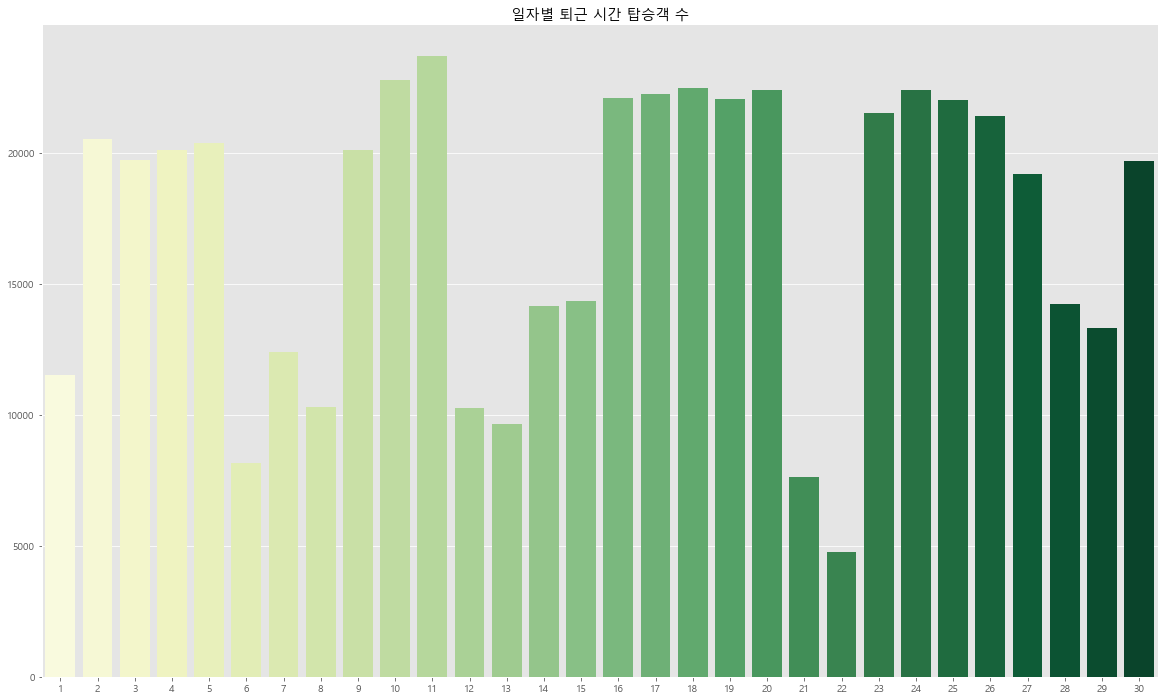

In [56]:
date_18sum = train.groupby('date')['18~20_ride'].sum()
plt.figure(figsize=(20,12))
sns.barplot(x = np.arange(1,31), y= date_18sum.values, palette='YlGn')
plt.title('일자별 퇴근 시간 탑승객 수')
plt.show()

In [20]:
train2['date'] = pd.to_datetime(train2['date'])

In [21]:
train2['day'] = train2['date'].dt.weekday

In [57]:
'월 화 수 목 금 토 일'.split()

['월', '화', '수', '목', '금', '토', '일']

Text(0.5, 1.0, '요일별 퇴근 시간 탑승객 수 평균')

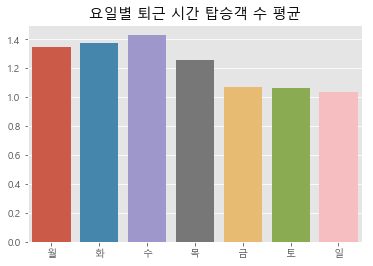

In [59]:
day_sum = train2.groupby('day')['18~20_ride'].mean()
sns.barplot(x='월 화 수 목 금 토 일'.split(), y=day_sum.values)
plt.title('요일별 퇴근 시간 탑승객 수 평균')

In [23]:
# bus route id 분석
by_route_mean = train.groupby('bus_route_id')['18~20_ride'].mean()
by_route_mean.sort_values(ascending=False)[:50]

bus_route_id
23620000    16.2450000000
23610000    14.9954407295
23580000    13.7259380098
23570000    12.3216560510
22530000     6.1233875491
29990000     6.0882352941
22520000     5.7969543147
32360000     4.9548611111
8170000      4.9490084986
23000000     4.7592592593
31220000     4.6000000000
32340000     4.5889212828
25000000     4.4146455224
32350000     4.3258594918
23320000     4.3124087591
23450000     4.1472803347
23280000     4.1403940887
23500000     4.0564866543
24020000     4.0253878702
23220000     4.0098314607
21000000     3.9864406780
21520000     3.9356872636
25010000     3.8368495077
24030000     3.8152096660
21480000     3.7119496855
23330000     3.6184122748
21290000     3.5169811321
23020000     3.5059652928
28640000     3.5000000000
21010000     3.4731707317
29940000     3.3030303030
23460000     3.1324303988
23710000     3.1126449475
4270000      3.1043814433
23090000     3.0726622990
21080000     3.0586734694
23240000     2.9188063845
21410000     2.8884615385

In [24]:
by_route_mean = by_route_mean.sort_values(ascending=False)

Text(0.5, 1.0, '평균 승객 가장 많은 TOP 10')

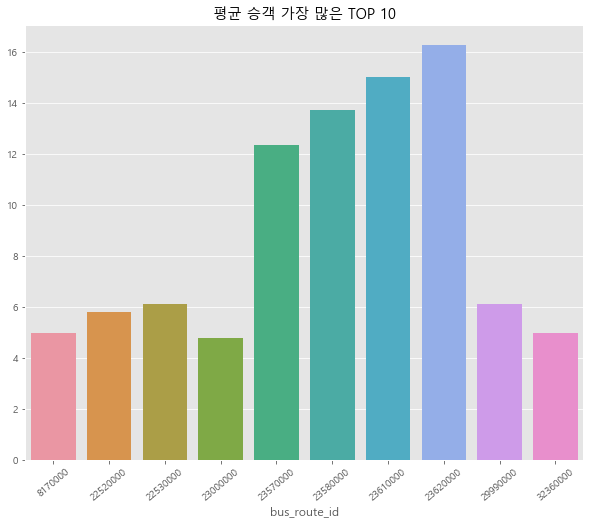

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x=by_route_mean.index[:10], y=by_route_mean.values[:10])
plt.xticks(rotation=40)
plt.title("평균 승객 가장 많은 TOP 10")

In [26]:
train[train['bus_route_id'] == 23620000]

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
3634,3634,2019-09-01,23620000,시내,117,남국사,33.46049,126.54979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3635,3635,2019-09-01,23620000,시내,119,죽성마을입구,33.46313,126.54910,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
3636,3636,2019-09-01,23620000,시내,121,제주대학교병원,33.46909,126.54739,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,3.0,3.0,0.0,0.0
3637,3637,2019-09-01,23620000,시내,123,인다마을,33.47145,126.54540,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,3.0,5.0,0.0
3638,3638,2019-09-01,23620000,시내,125,아라주공아파트,33.47366,126.54542,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,8.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403990,403990,2019-09-30,23620000,시내,3272,고산동산(아라방면),33.49600,126.53228,0.0,6.0,13.0,13.0,19.0,12.0,0.0,2.0,1.0,8.0,13.0,9.0,5.0
403991,403991,2019-09-30,23620000,시내,3274,제주지방법원(아라방면),33.49311,126.53509,0.0,2.0,6.0,5.0,13.0,5.0,2.0,4.0,2.0,3.0,7.0,7.0,13.0
403992,403992,2019-09-30,23620000,시내,3276,제주중앙여자고등학교(아라방면),33.48941,126.53864,0.0,3.0,6.0,7.0,8.0,1.0,0.0,1.0,2.0,6.0,2.0,8.0,10.0
403993,403993,2019-09-30,23620000,시내,3278,제주여자중고등학교(아라방면),33.48486,126.54293,1.0,0.0,9.0,0.0,8.0,1.0,0.0,6.0,6.0,3.0,5.0,6.0,2.0


In [27]:
train[train['bus_route_id'] == 23610000]

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
3591,3591,2019-09-01,23610000,시내,116,남국사,33.46215,126.54958,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3592,3592,2019-09-01,23610000,시내,120,제주대학교병원,33.46916,126.54777,2.0,2.0,1.0,4.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3593,3593,2019-09-01,23610000,시내,122,인다마을,33.47064,126.54582,9.0,3.0,8.0,8.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3594,3594,2019-09-01,23610000,시내,124,아라주공아파트,33.47308,126.54569,4.0,3.0,11.0,20.0,4.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3595,3595,2019-09-01,23610000,시내,131,아라동주민센터,33.47590,126.54490,2.0,2.0,2.0,1.0,10.0,10.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403950,403950,2019-09-30,23610000,시내,3273,고산동산(광양방면),33.49554,126.53291,3.0,5.0,11.0,10.0,16.0,12.0,0.0,4.0,2.0,2.0,2.0,2.0,22.0
403951,403951,2019-09-30,23610000,시내,3275,제주지방법원(광양방면),33.49363,126.53476,5.0,19.0,11.0,22.0,14.0,18.0,0.0,2.0,0.0,6.0,2.0,0.0,24.0
403952,403952,2019-09-30,23610000,시내,3277,제주중앙여자고등학교(광양방면),33.48902,126.53920,2.0,7.0,7.0,12.0,9.0,8.0,0.0,1.0,3.0,1.0,4.0,0.0,21.0
403953,403953,2019-09-30,23610000,시내,3279,제주여자중고등학교(광양방면),33.48520,126.54289,4.0,8.0,9.0,6.0,5.0,5.0,0.0,3.0,0.0,1.0,0.0,1.0,24.0


In [28]:
a = train[train['bus_route_id'] == 23620000]['station_code'].unique()
len(a)

54

In [29]:
b = train[train['bus_route_id'] == 23610000]['station_code'].unique()
len(b)

72

In [30]:
cnt = 0
for row in a:
    if row in b:
        print(row)
        cnt += 1
cnt

123
125
185
188
206
269
272
284
286
304
306
308
319
320
323
324
358
360
361
431
433
443
637
3270
3272
3274
3276
3278
3280
120
1355
270
283
299
3271
3275
201
325
124
3273
3277
3279


42

- 평균 승객이 가장 많은 루트와 두번째의 루트를 비교해보니 42군데가 겹침

In [31]:
bus_routes = train.groupby(['bus_route_id','date'])['18~20_ride'].sum().reset_index()
bus_routes

,bus_route_id,date,18~20_ride
0,4270000,2019-09-01,79.0
1,4270000,2019-09-02,92.0
2,4270000,2019-09-03,65.0
3,4270000,2019-09-04,58.0
4,4270000,2019-09-05,74.0
...,...,...,...
15632,32820000,2019-09-26,0.0
15633,32820000,2019-09-27,0.0
15634,32820000,2019-09-28,0.0
15635,32820000,2019-09-29,0.0


In [32]:
pivot = bus_routes.pivot_table('18~20_ride', index='date', columns='bus_route_id').fillna(0.0)

In [62]:
type(pivot)

pandas.core.frame.DataFrame

In [33]:
pivot.describe().T

,count,mean,std,min,25%,50%,75%,max
bus_route_id,,,,,,,,
4270000,30.0,80.3000000000,26.6667169540,19.0,65.25,79.0,93.75,159.0
4280000,30.0,65.0666666667,15.7347262193,28.0,54.00,67.0,74.50,93.0
7990000,30.0,0.0000000000,0.0000000000,0.0,0.00,0.0,0.00,0.0
8170000,30.0,58.2333333333,27.1517870541,12.0,45.50,55.0,72.75,118.0
8180000,30.0,18.8666666667,14.1536722013,1.0,10.25,16.0,25.75,77.0
17010000,30.0,0.1333333333,0.4341724855,0.0,0.00,0.0,0.00,2.0
20010000,30.0,6.1666666667,5.1063404355,0.0,2.00,5.0,8.75,17.0
20040000,30.0,0.0333333333,0.1825741858,0.0,0.00,0.0,0.00,1.0
20050000,30.0,0.0000000000,0.0000000000,0.0,0.00,0.0,0.00,0.0


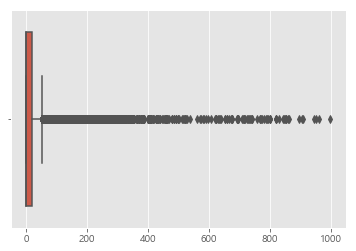

In [34]:
sns.boxplot(x=pivot.columns, data=pivot)

In [35]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [36]:
# datetime
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.weekday
# 평일 ,주말, 휴일 변경
data.loc[data['day'] < 5, 'day'] = 0
data.loc[data['day'] >=5, 'day'] = 1

holidays = pd.to_datetime(["2019-09-12", "2019-09-13", "2019-09-14", "2019-10-03", "2019-10-09"])
data.loc[data['date'].isin(holidays), 'day'] = 2

# 시내, 시외
data['in_out'] = data['in_out'].map({'시내': 0, "시외":1})

# 2시간 간격으로 변경
data['6~8_ride'] = data.pop('6~7_ride') + data.pop('7~8_ride')
data['8~10_ride'] = data.pop('8~9_ride') + data.pop('9~10_ride')
data['10~12_ride'] = data.pop('10~11_ride') + data.pop('11~12_ride')

data['6~8_takeoff'] = data.pop('6~7_takeoff') + data.pop('7~8_takeoff')
data['8~10_takeoff'] = data.pop('8~9_takeoff') + data.pop('9~10_takeoff')
data['10~12_takeoff'] = data.pop('10~11_takeoff') + data.pop('11~12_takeoff')

In [37]:
data['station_code'] = data['station_code'].astype(str)
l_encoder = LabelEncoder()
encoded = l_encoder.fit_transform(data['station_code'])
data['station_code'] = encoded

In [38]:
data = data.drop(['bus_route_id','date','id','station_name','latitude','longitude'], axis=1)

In [63]:
train.shape

(415423, 21)

In [39]:
trainset = data.dropna()
testset = data.iloc[415423:]

In [40]:
x_train = trainset.drop("18~20_ride", axis=1)
y_train = trainset["18~20_ride"]

In [41]:
x_test = testset.dropna(axis=1)

In [42]:
lgb = lgb.LGBMRegressor(
     n_estimators=500
    ,random_state=123
)

In [43]:
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
       random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [44]:
pred = lgb.predict(x_test)

In [45]:
from tensorflow import keras

In [49]:
# deep learning
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[len(x_train.columns)]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

In [64]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mse','mae']
)

In [67]:
model.fit(x_train.values, 
          y_train.values,
          batch_size=256,
          validation_split=0.2,
          epochs=20)

Train on 332338 samples, validate on 83085 samples
Epoch 1/20
332338/332338 [==============================] - 2s 6us/sample - loss: 12.6387 - mse: 12.6387 - mae: 1.2610 - val_loss: 9.4174 - val_mse: 9.4174 - val_mae: 1.2706
Epoch 2/20
332338/332338 [==============================] - 2s 6us/sample - loss: 12.6530 - mse: 12.6530 - mae: 1.2668 - val_loss: 9.2595 - val_mse: 9.2595 - val_mae: 1.1854
Epoch 3/20
332338/332338 [==============================] - 2s 6us/sample - loss: 12.6632 - mse: 12.6632 - mae: 1.2689 - val_loss: 9.1649 - val_mse: 9.1649 - val_mae: 1.1874
Epoch 4/20
332338/332338 [==============================] - 2s 6us/sample - loss: 12.6941 - mse: 12.6941 - mae: 1.2704 - val_loss: 9.1772 - val_mse: 9.1772 - val_mae: 1.1081
Epoch 5/20
332338/332338 [==============================] - 2s 6us/sample - loss: 12.6793 - mse: 12.6793 - mae: 1.2776 - val_loss: 9.2765 - val_mse: 9.2765 - val_mae: 1.2795
Epoch 6/20
332338/332338 [==============================] - 2s 6us/sample - los